## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from google.colab import files

import warnings
warnings.filterwarnings('ignore')

## Load Data

In [3]:
books = pd.read_csv("https://raw.githubusercontent.com/Capstonee-CH2-PS445/Machine-Learning/main/books_cleaned.csv")
ratings = pd.read_csv("https://raw.githubusercontent.com/Capstonee-CH2-PS445/Machine-Learning/main/ratings.csv")

## Split the Data
80% training and 20% test data

In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(ratings, test_size=0.2, random_state=42)

print(f"Training data shape: {train.shape}")
print(f"Test data shape: {test.shape}")

Training data shape: (785404, 3)
Test data shape: (196352, 3)


In [5]:
#nunique() will return the total number of unique items

book_id = ratings.book_id.nunique()

user_id = ratings.user_id.nunique()
print('Total books: ' + str(book_id))
print('Total users: ' + str(user_id))

Total books: 10000
Total users: 53424


# Build the Model

In [6]:
from tensorflow.keras.layers import Dense, Flatten, Input, Embedding, Concatenate, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [7]:
#Embedding layer for books
books_input = Input(shape=[1])#1st Input Layer
embedding_layer_books = Embedding(book_id + 1,10)(books_input)#Embedding layer
embedding_output_books = Flatten()(embedding_layer_books)#Embedding layer output

#Embedding layer for users
users_input = Input(shape=[1])#1st Input Layer
embedding_layer_users = Embedding(user_id + 1,10)(users_input)#Embedding layer
embedding_output_users = Flatten()(embedding_layer_users)#Embedding layer output

In [8]:
#Concatenation and Dense layer

joining_layer = Concatenate()([embedding_output_books, embedding_output_users])
hidden_layer_1 = Dense(128, activation='relu')(joining_layer)
hidden_layer_1 = Dropout(0.5)(hidden_layer_1)

output_layer = hidden_layer_2 = Dense(1)(hidden_layer_1)

model = tf.keras.Model([books_input, users_input], output_layer)

In [9]:
#Model compilation

optimizer = Adam(lr=0.001, epsilon = 1e-6, amsgrad=True) #epsilon = decay rate
model.compile(optimizer = optimizer, loss = 'mean_squared_error')#Using mean squared error as loss function

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding (Embedding)       (None, 1, 10)                100010    ['input_1[0][0]']             
                                                                                                  
 embedding_1 (Embedding)     (None, 1, 10)                534250    ['input_2[0][0]']             
                                                                                              

In [11]:
#Training model

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 2)

model.fit(
    [train.book_id, train.user_id], train.rating,
    batch_size=64,
    epochs=20,
    verbose=1,
    callbacks = [early_stopping],
    validation_data=([test.book_id, test.user_id], test.rating))

Epoch 1/20
12272/12272 [==============================] - 128s 10ms/step - loss: 0.8344 - val_loss: 0.7150
Epoch 2/20
12272/12272 [==============================] - 123s 10ms/step - loss: 0.7637 - val_loss: 0.7085
Epoch 3/20
12272/12272 [==============================] - 123s 10ms/step - loss: 0.7234 - val_loss: 0.7059
Epoch 4/20
12272/12272 [==============================] - 122s 10ms/step - loss: 0.6960 - val_loss: 0.7061
Epoch 5/20
12272/12272 [==============================] - 121s 10ms/step - loss: 0.6729 - val_loss: 0.7046
Epoch 6/20
12272/12272 [==============================] - 122s 10ms/step - loss: 0.6529 - val_loss: 0.7045
Epoch 7/20
12272/12272 [==============================] - 123s 10ms/step - loss: 0.6365 - val_loss: 0.7073
Epoch 8/20
12272/12272 [==============================] - 123s 10ms/step - loss: 0.6224 - val_loss: 0.7083


<Axes: >

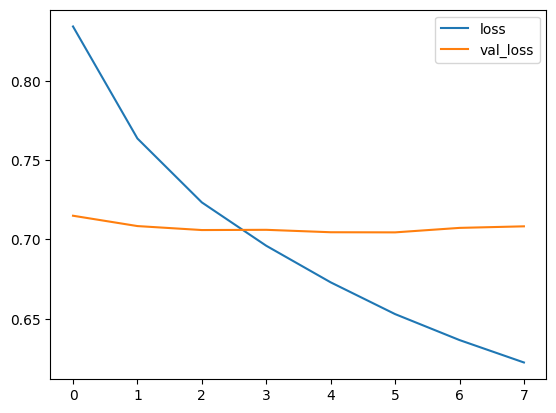

In [13]:
loss = pd.DataFrame(model.history.history)

loss[['loss', 'val_loss']].plot()

In [12]:
#Saving the model
model.save('model.h5')
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>